In [28]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


docs = [
    "buy cheap Burger",
    "limited time offer",
    "earn money fast",
    "meeting schedule project",
    "lunch with client",
    "budget for Q4"
]

labels = ["spam", "spam", "spam", "ham", "ham", "ham"]

docs_extended = docs + [
    "exclusive deal just for you",
    "project deadline extended",
    "earn rewards now",
    "team meeting tomorrow",
    "cheap tickets available",
    "client feedback received"
]
labels_extended = labels + [
    "spam",
    "ham",
    "spam",
    "ham",
    "spam",
    "ham"
]



In [29]:
X_train, X_test, y_train, y_test = train_test_split(docs_extended, labels_extended, test_size=0.3, random_state=42)

# Step 2: Vectorize text
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


model = MultinomialNB()
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)

In [30]:
# Step 2: Train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Step 3: Predict new message
new_doc = ["cheap lunch offer"]
X_new = vectorizer.transform(new_doc)


In [31]:
predicted_label = model.predict(X_new)[0]

print(f"Predicted label: {predicted_label}")

Predicted label: ham


In [32]:
new_doc2 = ["My name is John Doe"]
X_new2 = vectorizer.transform(new_doc2)
predicted_label2 = model.predict(X_new2)[0]
print(f"Predicted label for new_doc2: {predicted_label2}")

Predicted label for new_doc2: ham


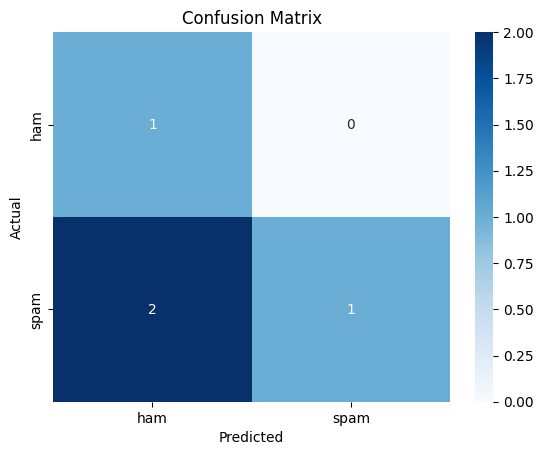

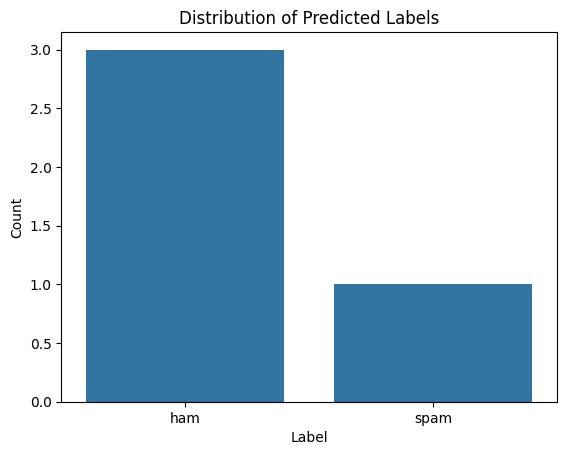

In [33]:
# Visualize the confusion matrix for the test set
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Visualize the distribution of predicted labels
sns.countplot(x=y_pred)
plt.title('Distribution of Predicted Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.2f}")


Model accuracy: 0.80
